# Defence - Theoretical Analysis

In the following theoretical experiments, we use values from our simulation;
the maximum capacity of a link is $20$ Gbits/snapshot and each malicious route sends out $4$ Gbits/snapshot.

Recall that a malicious route is **successful** if it travels through the target link.

The attacker therefore needs $5$ successes for a successful LFA.

### Probability of a successful LFA after at most $K$ trials against $r_\text{max}$

We constrain $r_\text{max}$ and $K$ such that $1 \leq r_\text{max} \leq 20$ and $5 \leq K \leq 60$.


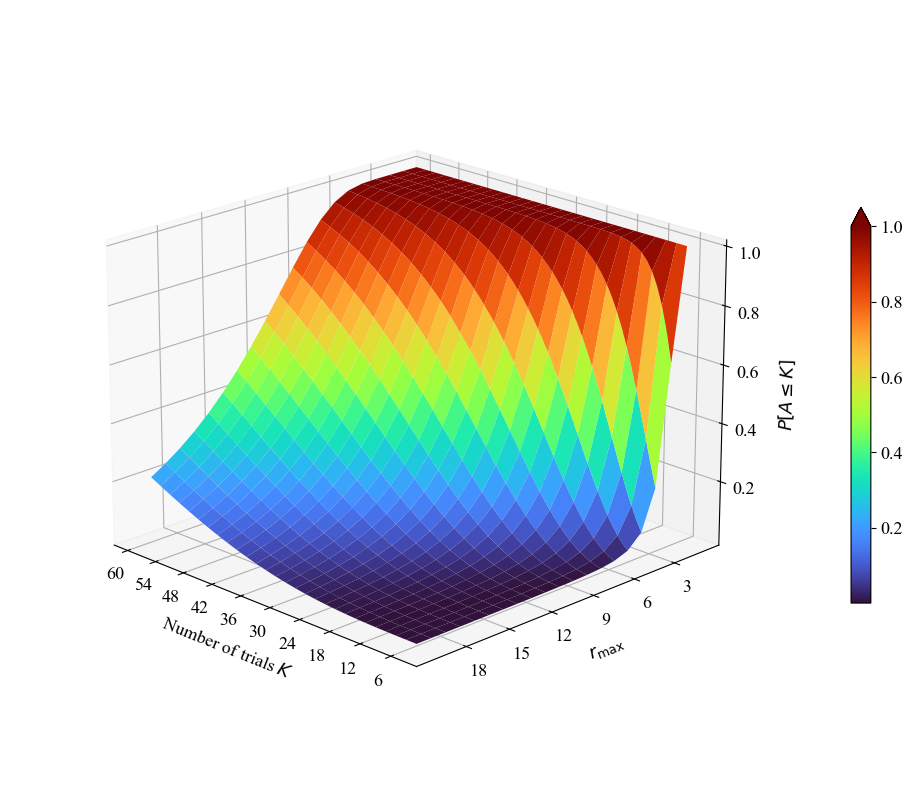

In [457]:
# Import libraries
import numpy as np
from scipy.stats import nbinom
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from matplotlib.ticker import MaxNLocator

matplotlib.rcParams["font.sans-serif"] = "Times New Roman"
matplotlib.rcParams["font.size"] = 13

# CDF given (rmax, K)
r_max_arr = np.arange(1, 21)            # maximum index of the randomly selected multipath.
n = 5                                   # number of successes needed to congest the link.
trials_arr = np.arange(n, 60)           # number of executed routes (trials)


cdf_matrix = np.zeros(shape=(len(r_max_arr), len(trials_arr)))
for idx, r_max in enumerate(r_max_arr):
    p = 1/r_max                 # probability of a success.
    cdf_matrix[idx, :] = nbinom.cdf(trials_arr, n, p)


# 3D Plot
fig = plt.figure(figsize=(11, 8), constrained_layout=True)
ax = fig.add_subplot(111, projection="3d")
ax.view_init(elev=20, azim=135)
ax.set_box_aspect(aspect=None, zoom=.85)
x_axis, y_axis = np.meshgrid(trials_arr, r_max_arr)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel(r"Number of trials $K$", labelpad=10)
ax.set_ylabel(r"$r_\text{max}$", labelpad=10)
ax.set_zlabel(r"$P[A \leq K]$", labelpad=10) 
surf = ax.plot_surface(x_axis, y_axis, cdf_matrix, cmap = cm.turbo)
bar = fig.colorbar(surf, ax=ax, shrink=0.5, extend='max')
plt.savefig("images/defence_cdf.svg", format='svg')
plt.show()

### Expected malicious traffic per snapshot against $K$ trials and $r_\text{max}$ 
We constrain $r_\text{max}$ and $K$ such that $1 \leq r_\text{max} \leq 20$ and $5 \leq K \leq 60$.

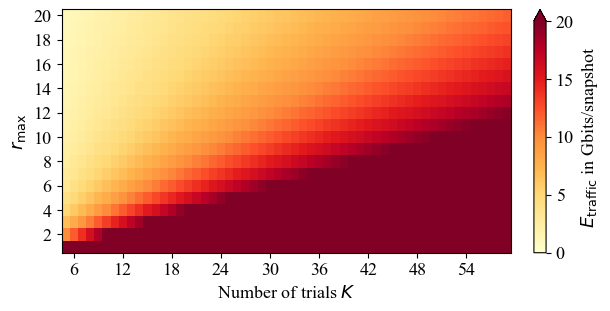

In [458]:
from scipy.stats import binom
from matplotlib.ticker import MaxNLocator

# INITIAL VALUES
r_max_arr = np.arange(1, 21)        # Number of different possible values of r_max.
trials_arr = np.arange(5, 60)       # Number of maliciously executed routes per snapshot. Equivalent to the number of independent trials.


# MEAN given (rmax, K)
mean_matrix = np.zeros(shape=(len(r_max_arr), len(trials_arr)))
for i, r_max in enumerate(r_max_arr):
    p = 1/r_max
    for j, trials in enumerate(trials_arr):
        mean_matrix[i, j] = binom.mean(trials, p)*4  # scale to 4 GBits/snapshot per success (4 GBits/snapshot)

# 2D matrix plot.
fig, ax = plt.subplots(figsize=(6, 3), constrained_layout=True)
x_axis, y_axis = np.meshgrid(trials_arr, r_max_arr)
cbar = ax.pcolormesh(x_axis, y_axis, mean_matrix, cmap=cm.YlOrRd, vmin=0, vmax=20)
bar = fig.colorbar(cbar, ax=ax, extend='max', label=r"$E_\text{traffic}$ in Gbits/snapshot")
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel(r"Number of trials $K$")
plt.ylabel(r"$r_\text{max}$")
plt.savefig("images/defence_mean.svg")
plt.show()

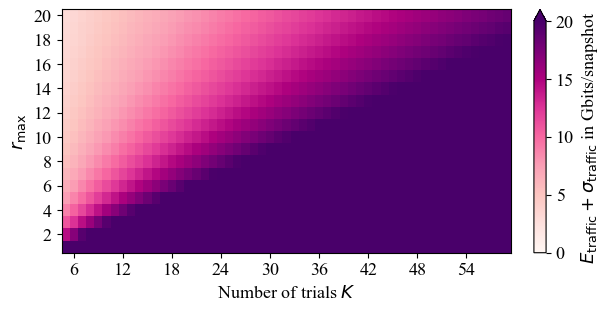

In [459]:
# MEAN + STANDARD DEVIATION given (rmax, K)
# Compute standard deviation
std_matrix = np.zeros(shape=(len(r_max_arr), len(trials_arr)))
for i, r_max in enumerate(r_max_arr):
    p = 1/r_max
    for j, trials in enumerate(trials_arr):
        std_matrix[i, j] = binom.std(trials, p)*4  # scale to 4 GBits/snapshot per success (4 GBits/snapshot)

# Plot the data on a 2D matrix.
fig, ax = plt.subplots(figsize=(6, 3), constrained_layout=True)
x_axis, y_axis = np.meshgrid(trials_arr, r_max_arr)
cbar = ax.pcolormesh(x_axis, y_axis, mean_matrix + std_matrix, cmap=cm.RdPu, vmin=0, vmax=20)
bar = fig.colorbar(cbar, ax=ax, label=r"$E_\text{traffic} + \sigma_\text{traffic}$ in Gbits/snapshot", extend='max')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel(r"Number of trials $K$")
plt.ylabel(r"$r_\text{max}$")
plt.savefig("images/defence_std.svg")
plt.show()

### Assessing the performance of $P[A \leq K]$ and $E_\text{traffic}[B]$.
CURRENTLY NOT BEING USED.